# Trabajo de análisis de imágenes
### Autores: Laura Lucendo y Guillermo Valle

Explicación buena del trabajo

Antes de empezar a ejecutar el notebook es importante crear un entorno virtual que reúna los requisitos necesarios para el correcto funcionamiento del mismo. En el archivo **environment.yml** se encuentran todas las librerías y sus correspondientes versiones necesarias para poder ejecutar la práctica sin problema. Para ello, el comando a ejecutar es el siguiente:

In [ ]:
#En caso de ser macOS
conda env create -f environment_mac.yml -n images_env 
#En caso de ser windows
conda env create -f environment_windows.yml -n images_env 

## 1. Descarga de imágenes de Google

El dataset con el que se comenzó a trabajar es un dataset de Kaggle que se encuentra en el siguiente [link](https://www.kaggle.com/dansbecker/5-celebrity-faces-dataset), y contiene las imágenes de 5 famosos. Puesto a que se disponía de un número reducido de imágenes, se ha creado un script de descarga de imágenes de Google para poder ampliar nuestro dataset para el posterior entrenamiento de la red.
Este módulo tiene el código necesario para la descarga de imágenes de Google según las indicaciones que se le pasen a la función 'get_new_images()'. En caso de querer obtener más información se puede ver el script **'google_images.py'** del proyecto.
Para poder ejecutar este módulo es necesario tener el fichero chromedriver.exe descargado o instalado. En el siguiente [link](https://www.notion.so/Chuleta-6-Chromedriver-a73835df5e304c3cbd73b6d8cc2cd40c) se tiene una guía de como instalar chromedriver. Si el ordenador es windows, el código está preparado para tener el fichero 'chromedriver.exe' en la carpeta del proyecto.

In [2]:
# Carga de la clase y creación de la instancia
from google_images import GOOGLE_IMAGES
google_img = GOOGLE_IMAGES()

Instancia de la clase GOOGLE_IMAGES creada


In [3]:
# Descarga de las imágenes de los famosos que se quieran tener
google_img.get_new_images(search_keyword = ['Messi', 'Beyonce','Shakira','Sara Carbonero','Miley Cyrus'], visible= False)

Descarga de imágenes de la búsqueda: Messi face HD
Descarga de imágenes de la búsqueda: Messi side face HD
Descarga de imágenes de la búsqueda: Messi looking up HD
Descarga de imágenes de la búsqueda: Messi looking down HD
Descarga de imágenes de la búsqueda: Messi wearning glasses HD
Descarga de imágenes de la búsqueda: Messi happy face HD
Descarga de imágenes de la búsqueda: Messi close up HD
Descarga de imágenes de la búsqueda: Beyonce face HD
Descarga de imágenes de la búsqueda: Beyonce side face HD
Descarga de imágenes de la búsqueda: Beyonce looking up HD
Descarga de imágenes de la búsqueda: Beyonce looking down HD
Descarga de imágenes de la búsqueda: Beyonce wearning glasses HD
Descarga de imágenes de la búsqueda: Beyonce happy face HD
Descarga de imágenes de la búsqueda: Beyonce close up HD
Descarga de imágenes de la búsqueda: Shakira face HD
Descarga de imágenes de la búsqueda: Shakira side face HD
Descarga de imágenes de la búsqueda: Shakira looking up HD
Descarga de imágenes

Cuando se han descargado las imágenes se realiza una revisión rápida y se pasan las mismas a las carpetas de las rutas 'archive/data/train' y 'archive/data/val' para tener en el dataset otra persona pública más. Este proceso se puede hacer manual o se puede realizar al ejecutar el siguiente comando que llama a la función 'move_new_images()'. Este método permite mover las imágenes que se acaban de descargar a las carpetas tanto de entrenamiento como de validación. Si para cada pose ('face', 'side face', 'looking up'...) que hemos usado para obtener las fotos tenemos el número de fotos pasado a la función 'get_new_images' con el parámetro 'n_img', la función 'move_new_images()' nos permite decidir cuántas imágenes queremos que vayan a la carpeta de validación. Por ejemplo, si para adquirir las imágenes indicamos que 'n_img' será 8, podríamos asignarle a 'val_num' el valor de 2 con el fin de mandar 2 fotos a la carpeta de validación.

In [4]:
# Descarga de las imágenes de los famosos que se quieran tener
google_img.move_new_images()

Moviendo las imágenes descargadas
Movimiento de imágenes finalizado


## 2. Análisis exploratorio de los datos

En este apartado se realiza un pequeño análisis exploratorio de los datos que se tienen para entrenar los modelos. Se disponen de dos modelos preentrenados que se han guardado en la ruta 'archive/keras_pretrained_models/'.

In [1]:
# Directorio de trabajo
cwd = os.getcwd()

# Directorios de las imágenes de entrenamiento y validacion
train_data_dir=os.path.join(cwd, 'archive/data/train')
validation_data_dir=os.path.join(cwd,'archive/data/val')

In [2]:
# Conteo del número de imágenes disponibles para entrenamiento y validación
totalFilesTrain = 0
totalFilesVal = 0
for root, dirs, files in os.walk(train_data_dir):
    for name in files:
        (base, ext) = os.path.splitext(name) # split base and extension
        if ext in ('.jpg', '.png'):          # check the extension
            totalFilesTrain += 1
for root, dirs, files in os.walk(validation_data_dir):
    for name in files:
        (base, ext) = os.path.splitext(name) # split base and extension
        if ext in ('.jpg', '.png'):          # check the extension
            totalFilesVal += 1
print('Se disponen de {} imágenes para entrenamiento'.format(totalFilesTrain))
print('Se disponen de {} imágenes para validación'.format(totalFilesVal))

Se disponen de 122 imágenes para entrenamiento
Se disponen de 35 imágenes para validación


Puesto que queremos que nuestros modelos tengan suficientes imágenes, como bien comentamos anteriormente, además de crear la función que nos permitirá descargar imágenes de Google, utilizaremos Data Augmentation para poder mejorar el proceso de aprendizaje de los datos disponibles y realizar una buena clasificación al aumentar aún más el tamaño de nuestro dataset.

## 3. Data Augmentation

El código desarrollado para la generación de imágenes a partir de Data Augmentation se encuentra en la clase CNN del script **'cnn.py'**. En las siguientes líneas se muestra como se han generado las nuevas imágenes y se imprime por pantalla un collage que recoge 6 imágenes generadas con esta clase a partir del dataset de origen. La función 'train(test_data_aug = True)' devuelve un batch con el que generamos el collage para comprobar como se realiza el data augmentation.

In [3]:
# Carga de la clase y creación de la instancia
from cnn import CNN
cnn = CNN()

Using TensorFlow backend.
Instancia de la clase DATA_AUGMENTATION creada


In [13]:
# Generación de las imágenes
batch = cnn.train(test_data_aug = True)

Found 122 images belonging to 7 classes.


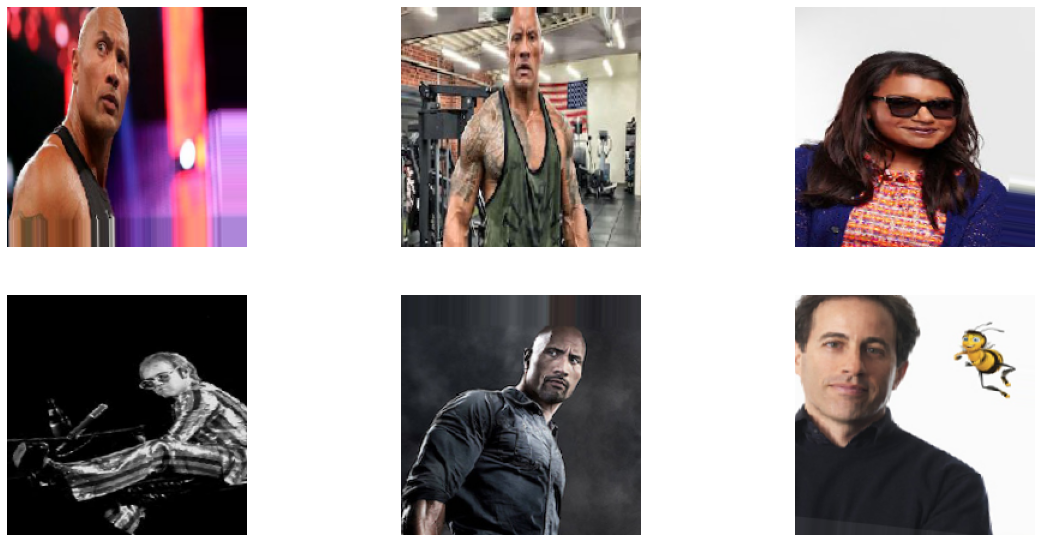

In [14]:
import matplotlib.pyplot as plt
# Collage de las imágenes generadas
fig = plt.figure(figsize=(20, 15))
for i in range(6):
    #batch=next(train_generator) # returns the next batch of images and labels 
    # define subplot
    fig.add_subplot(330 + 1 + i)
    # generate batch of images
    # convert to unsigned integers for viewing
    image = batch[0][i]
    plt.imshow(image)
    # plot raw pixel data
    #plt.imshow(image)
    plt.axis('off')
    # show the figure
plt.show()

## 4. CNN preentrenadas

En este apartado se hace uso de una red preentrenada llamada 'vgg16CNNtl' y que tiene la función 'vgg16CNNtl()' en la clase CNN. Para realizar el entrenamiento de la misma es necesario llamar a la función 'train' de la clase CNN y meterle como argumentos los parámetros necesarios con sus valores correspondientes (train_data_dir, validation_data_dir, model, dropout, epochs, learning_rate and decay). 

En este trabajo, hemos querido explorar cómo la variación de diferentes parámetros pueden afectar en la precisión de nuestro modelo. Es por ello por lo que en los siguientes apartados se estudia la influencia de diferentes valores de dropout (0.5 y 0.2) en el modelo preentrenado 'vggCNNtl' así como de learning rate (1e-5,1e-2) y el decay (1e-7,1e-3). 

#### Dropout 0.5

En este primer caso, como se ha comentado anteriormente, se ha querido ver la influencia que tiene un valor del dropout de 0.5 en la precisión de nuestro modelo. Para ello, aunque ya hemos entrenado el modelo y lo hemos guardado, en la siguiente celda se muestra los comandos que han de ser ejecutados para entrenar el modelo variando alguno de los parametros que se recogen en los argumentos de la función 'train' de la clase CNN.

Por tanto, en caso de querer entrenar la red, los pasos a seguir se recogen en la siguiente celda donde los resultados obtenidos por cada epoch se muestran en pantalla así como los gráficos de pérdida y de presición de ambos conjuntos de datos (validación y entrenamiento). Además, con la función 'save' de la clase CNN se guarda el modelo en formato .h5 de manera que se pueda cargar sin necesidad de tener que entrenar la red de nuevo (este caso se muestra más adelante con la función 'load_model' de keras). Además, al llamar a la función train, los resultados y lo gráficos de pérdida y de precisión se guardan en una imagen en formato .png de manera que si queremos ver los resultados únicamente tenemos que cargar la imagen para ello.


Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Epoch 1/50
3/3 [==============================] - 57s 19s/step - loss: 2.1857 - accuracy: 0.1270 - val_loss: 1.6245 - val_accuracy: 0.2000
Epoch 2/50
3/3 [==============================] - 71s 24s/step - loss: 1.9068 - accuracy: 0.2000 - val_loss: 1.6071 - val_accuracy: 0.2800
Epoch 3/50
3/3 [==============================] - 37s 12s/step - loss: 1.7976 - accuracy: 0.1944 - val_loss: 1.6933 - val_accuracy: 0.2000
Epoch 4/50
3/3 [==============================] - 71s 24s/step - loss: 1.7002 - accuracy: 0.3667 - val_loss: 1.6039 - val_accuracy: 0.2000
Epoch 5/50
3/3 [==============================] - 53s 18s/step - loss: 1.7013 - accuracy: 0.2698 - val_loss: 1.5754 - val_accuracy: 0.2800
Epoch 6/50
3/3 [==============================] - 50s 17s/step - loss: 1.5777 - accuracy: 0.3016 - val_loss: 1.6434 - val_accuracy: 0.2000
Epoch 7/50
3/3 [==============================] - 67s 22s/step - loss: 1.7461 - accura

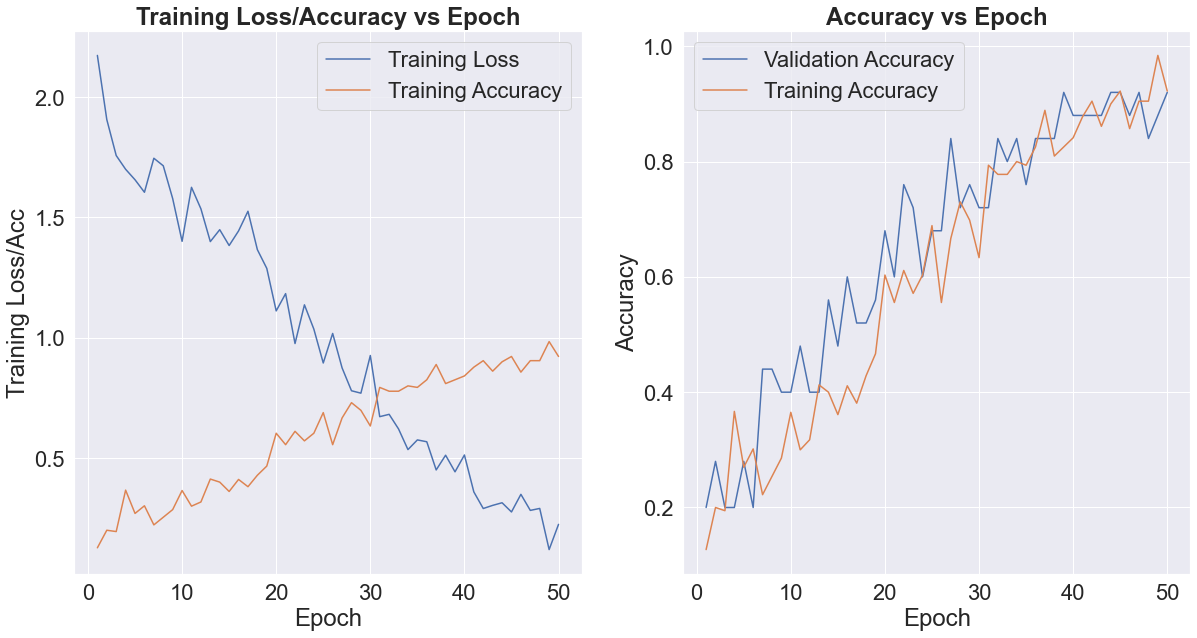

In [6]:
cnn.train(train_data_dir = train_data_dir, validation_data_dir = validation_data_dir, model = 'vgg16CNNtl', dropout = 0.5, epochs = 50, learning_rate = 1e-5, decay = 1e-7)
cnn.save('vgg16CNNtl_dropout05')

En caso de no querer entrenar la red de nuevo y siempre y cuando los datos de nuestro modelo tras haberlo entrenado se hayan guardado correctamente, es posible subir tanto el modelo como los gráficos anteriormente mencionados para analizar los resultados. En la siguiente celda se carga el modelo y se guarda en la variable model_1 con el fin de probar el funcionamiento del modelo más adelante con nuestros datos de validación. Posteriormente, se cargan los gráficos correspondientes a este mismo modelo para poder analizar los resultados.

In [3]:
from keras.models import load_model
model_1 = load_model('archive/models/vgg16CNNtl_dropout05.h5')

Los gráficos correspondientes a la pérdida y a la precisión del set de entrenamiento vs Epochs y las precisiones de ambos sets se muestran a continuación:

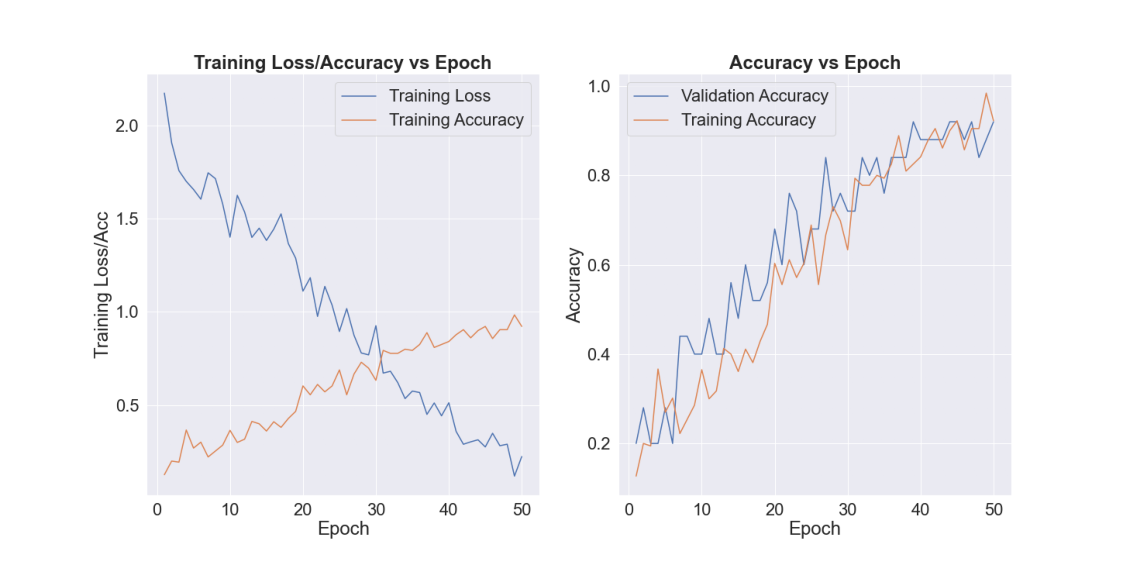

In [10]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
img = mpimg.imread('archive/models/vgg16CNNtl_dropout05_history.png')
imgplot = plt.imshow(img)
plt.axis("off")
plt.show()

El modelo 'model_1' cargado anteriormente se puede usar para validarlo ejecutando la siguiente celda donde se usa la función 'test' de la clase CNN para probar su funcionamiento con algunas muestras de validación. Vemos que la función devuelve una imagen con la clase a la que más se parece y el porcentaje de parecido a la misma. 

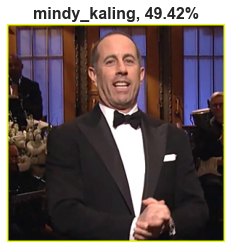

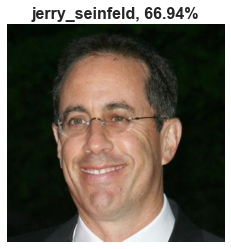

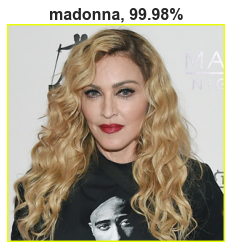

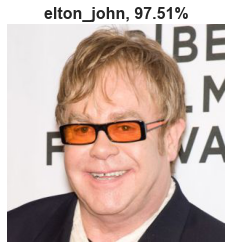

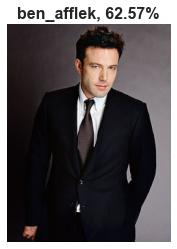

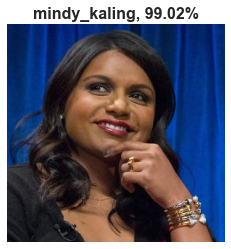

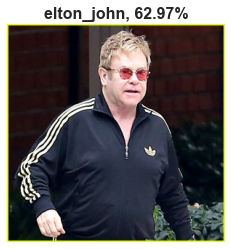

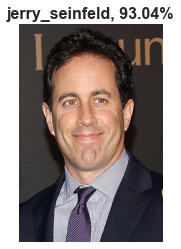

In [9]:
# Se obtiene una muestra de como funciona el modelo.
cnn.test(model = model_1)

#### Dropout 0.2

En este primer caso, como se ha comentado anteriormente, se ha querido ver la influencia que tiene un valor del dropout de 0.2 en la precisión de nuestro modelo. Para ello, aunque ya hemos entrenado el modelo y lo hemos guardado, en la siguiente celda se muestra los comandos que han de ser ejecutados para entrenar el modelo variando alguno de los parametros que se recogen en los argumentos de la función 'train' de la clase CNN.



Por tanto, en caso de querer entrenar la red, los pasos a seguir se recogen en la siguiente celda donde los resultados obtenidos por cada epoch se muestran en pantalla así como los gráficos de pérdida y de presición de ambos conjuntos de datos (validación y entrenamiento). Además, con la función 'save' de la clase CNN se guarda el modelo en formato .h5 de manera que se pueda cargar sin necesidad de tener que entrenar la red de nuevo (este caso se muestra más adelante con la función 'load_model' de keras). Además, al llamar a la función train, los resultados y lo gráficos de pérdida y de precisión se guardan en una imagen en formato .png de manera que si queremos ver los resultados únicamente tenemos que cargar la imagen para ello.



Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Epoch 1/50
3/3 [==============================] - 45s 15s/step - loss: 1.7896 - accuracy: 0.1746 - val_loss: 1.5736 - val_accuracy: 0.2400
Epoch 2/50
3/3 [==============================] - 45s 15s/step - loss: 1.7619 - accuracy: 0.2857 - val_loss: 1.5056 - val_accuracy: 0.3200
Epoch 3/50
3/3 [==============================] - 45s 15s/step - loss: 1.4533 - accuracy: 0.3651 - val_loss: 1.5074 - val_accuracy: 0.4800
Epoch 4/50
3/3 [==============================] - 61s 20s/step - loss: 1.4657 - accuracy: 0.4000 - val_loss: 1.3254 - val_accuracy: 0.6000
Epoch 5/50
3/3 [==============================] - 45s 15s/step - loss: 1.2272 - accuracy: 0.4921 - val_loss: 1.2365 - val_accuracy: 0.6800
Epoch 6/50
3/3 [==============================] - 46s 15s/step - loss: 1.3493 - accuracy: 0.6032 - val_loss: 1.1935 - val_accuracy: 0.7200
Epoch 7/50
3/3 [==============================] - 62s 21s/step - loss: 0.9948 - accura

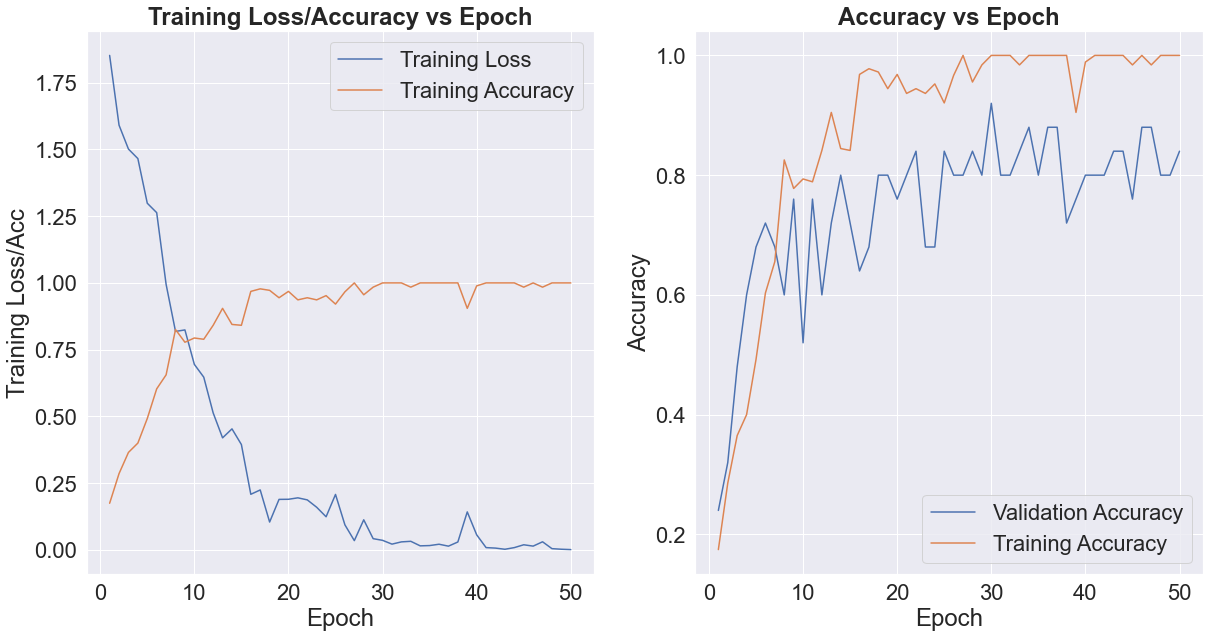

In [10]:
cnn.train(train_data_dir = train_data_dir, validation_data_dir = validation_data_dir, model = 'vgg16CNNtl', dropout = 0.2, epochs = 50, learning_rate = 1e-5, decay = 1e-7)
cnn.save('archive/models/vgg16CNNtl_dropout02')

En caso de no querer entrenar la red de nuevo y siempre y cuando los datos de nuestro modelo tras haberlo entrenado se hayan guardado correctamente, es posible subir tanto el modelo como los gráficos anteriormente mencionados para analizar los resultados. En la siguiente celda se carga el modelo y se guarda en la variable model_2 con el fin de probar el funcionamiento del modelo más adelante con nuestros datos de validación. Posteriormente, se cargan los gráficos correspondientes a este mismo modelo para poder analizar los resultados.

In [11]:
model_2 = load_model('archive/models/vgg16CNNtl_dropout02.h5')

Los gráficos correspondientes a la pérdida y a la precisión del set de entrenamiento vs Epochs y las precisiones de ambos sets se muestran a continuación:

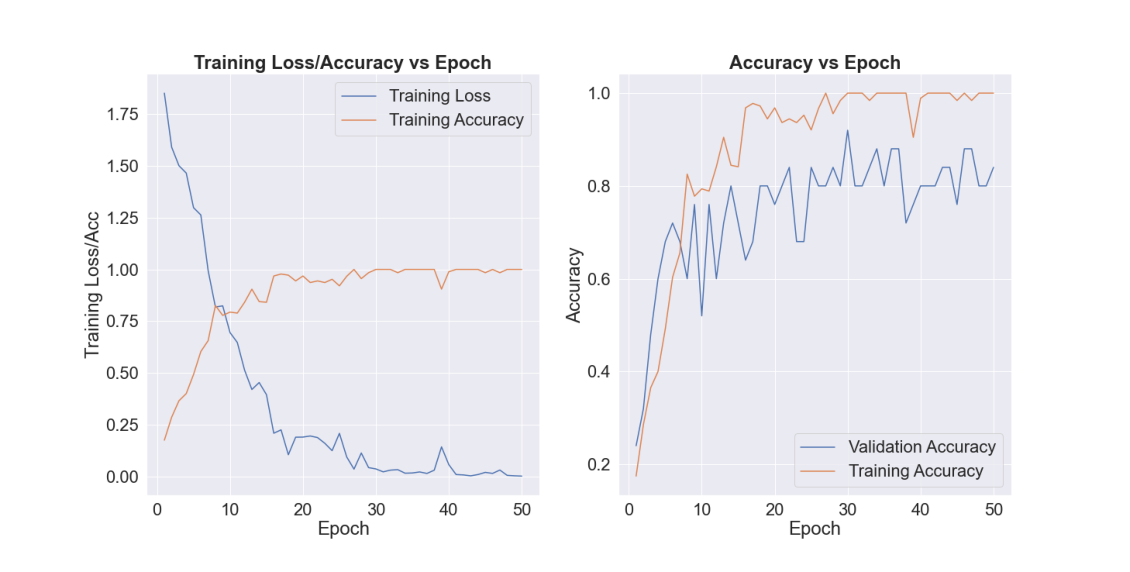

In [12]:
plt.figure(figsize=(20,20))
img = mpimg.imread('archive/models/vgg16CNNtl_dropout02_history.png')
imgplot = plt.imshow(img)
plt.axis("off")
plt.show()

El modelo 'model_2' cargado anteriormente se puede usar para validarlo ejecutando la siguiente celda donde se usa la función 'test' de la clase CNN para probar su funcionamiento con algunas muestras de validación. Vemos que la función devuelve una imagen con la clase a la que más se parece y el porcentaje de parecido a la misma. 

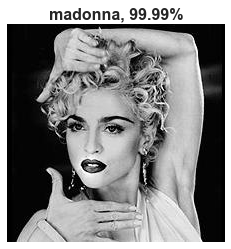

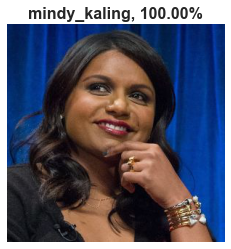

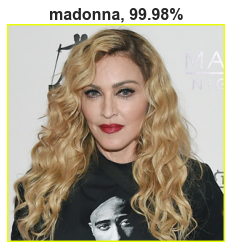

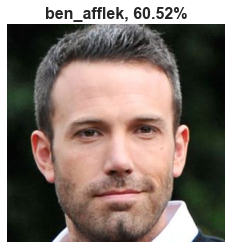

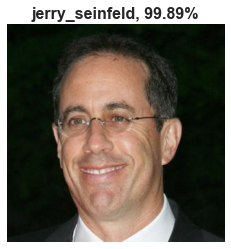

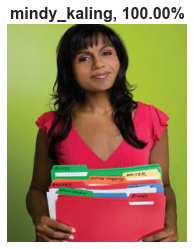

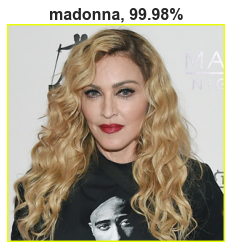

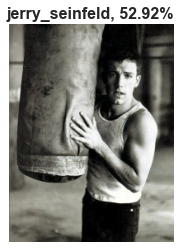

In [13]:
# Se obtiene una muestra de como funciona el modelo.
cnn.test(model = model_2)

Observando los resultados de ambos modelos: 'model_1' y 'model_2' se puede ver que los resultados más óptimos se obtienen en el primer modelo. Vemos que al aumentar el valor del dropout el overfitting disminuye llegando incluso a valores muy parecidos a la precisión de validación. Sin embargo, en el segundo caso, con un dropout de 0.2 se puede ver que el overfitting es muy significativo y la precisión empeora. Por tanto, se puede concluir que un mayor valor de dropout reduce el overfitting existente con un dropout de 0.2

#### Learning Rate 1e-2 

En este caso exploraremos cómo el learning rate puede influir en nuestros resultados (precisión y función de pérdida). Como se comentó anteriormente, se explorarán tanto los valores de 1e-5 como de 1e-2. Sin embargo, el caso de 1e-5 se aplica en el model_1. Por tanto, en este caso exploraremos los resultados al usar un learning rate de 1e-2 manteniendo el valor de dropout más óptimo obtenido anteriormente (0.5).

In [4]:
cnn.train(train_data_dir = train_data_dir, validation_data_dir = validation_data_dir, model = 'vgg16CNNtl', dropout = 0.5, epochs = 50, learning_rate = 1e-2, decay = 1e-7)
cnn.save('vgg16CNNtl_dropout05_LR1e-2')

Found 122 images belonging to 7 classes.
Found 35 images belonging to 7 classes.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



AttributeError: 'DirectoryIterator' object has no attribute 'ndim'

## 5. Clustering

In [1]:
# Carga de la clase y creación de la instancia
from clustering import CLUSTERING
clust = CLUSTERING()

Using TensorFlow backend.
Instancia de la clase CLUSTERING creada


In [2]:
# Entrenar facenet
clust.train(base_model = 'facenet_keras.h5')







loaded 14 sample for class: ben_afflek
loaded 13 sample for class: barack_obama


KeyboardInterrupt: 

In [4]:
clust.train(base_model = 'vgg16CNNtl_dropout05.h5')

KeyboardInterrupt: 

loaded 14 sample for class: ben_afflek
loaded 17 sample for class: elton_john
loaded 21 sample for class: jerry_seinfeld
loaded 19 sample for class: madonna
loaded 22 sample for class: mindy_kaling
(93, 200, 200, 3) (93,)
loaded 5 sample for class: ben_afflek
loaded 5 sample for class: elton_john
loaded 5 sample for class: jerry_seinfeld
loaded 5 sample for class: madonna
loaded 5 sample for class: mindy_kaling
(25, 200, 200, 3) (25,)
Loaded Model
[<tf.Tensor 'input_2_2:0' shape=(None, 200, 200, 3) dtype=float32>]
[<tf.Tensor 'sequential_2_2/dense_6/Softmax:0' shape=(None, 5) dtype=float32>]
(93, 5)
(25, 5)
(93, 2)


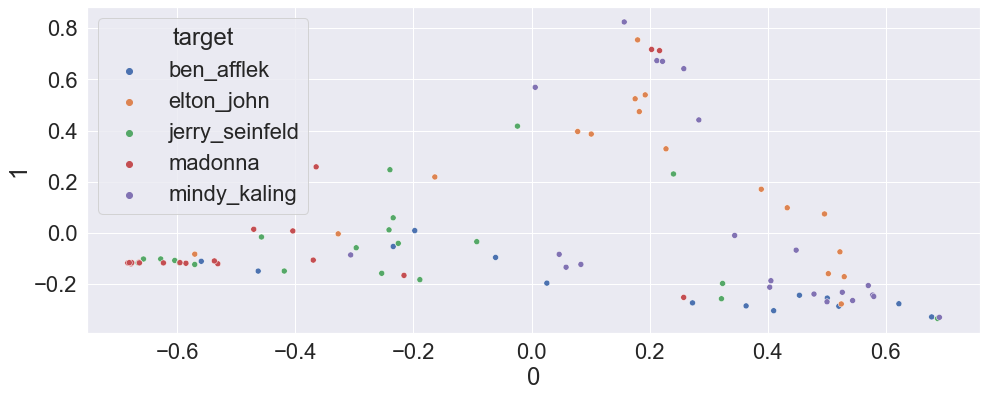

In [17]:
clust.train(base_model = 'vgg16CNNtl_dropout02.h5')